In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
data_1 = pd.read_csv('calories.csv')
data_2 = pd.read_csv('exercise.csv')

In [36]:
data = data_2.merge(data_1,on='User_ID')

In [37]:
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories_x,Calories_y
0,14733363,male,68,190,94,29,105,40.8,231,231.0
1,14861698,female,20,166,60,14,94,40.3,66,66.0
2,11179863,male,69,179,79,5,88,38.7,26,26.0
3,16180408,female,34,179,71,13,100,40.5,71,71.0
4,17771927,female,27,154,58,10,81,39.8,35,35.0
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45,45.0
14996,17212577,female,27,165,65,6,85,39.2,23,23.0
14997,17271188,female,43,159,58,16,90,40.1,75,75.0
14998,18643037,male,78,193,97,2,84,38.3,11,11.0


In [38]:
data_fin = data.drop('Calories_x',axis=1)

In [41]:
data_fin

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231.0
1,14861698,female,20,166,60,14,94,40.3,66.0
2,11179863,male,69,179,79,5,88,38.7,26.0
3,16180408,female,34,179,71,13,100,40.5,71.0
4,17771927,female,27,154,58,10,81,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45.0
14996,17212577,female,27,165,65,6,85,39.2,23.0
14997,17271188,female,43,159,58,16,90,40.1,75.0
14998,18643037,male,78,193,97,2,84,38.3,11.0


In [40]:
data_fin = data_fin.rename(columns={'Calories_y':'Calories'})

In [42]:
x = data_fin.loc[:,['Duration']]
y = data_fin.loc[:,['Calories']]

In [43]:
print(x)

       Duration
0            29
1            14
2             5
3            13
4            10
...         ...
14995        11
14996         6
14997        16
14998         2
14999        18

[15000 rows x 1 columns]


In [44]:
print(y)

       Calories
0         231.0
1          66.0
2          26.0
3          71.0
4          35.0
...         ...
14995      45.0
14996      23.0
14997      75.0
14998      11.0
14999      98.0

[15000 rows x 1 columns]


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [47]:
print(x_train)

       Duration
10439        23
9236         16
818          18
11504        18
11722        21
...         ...
13123        26
3264          1
9845         22
10799        13
2732          2

[10500 rows x 1 columns]


In [48]:
print(x_test)

       Duration
1670          9
13379         6
10234        22
4719         29
7003         19
...         ...
13499        20
3828         11
4645         13
6069         15
2506          3

[4500 rows x 1 columns]


In [49]:
print(y_train)

       Calories
10439     164.0
9236       71.0
818       133.0
11504     116.0
11722     131.0
...         ...
13123     175.0
3264        5.0
9845      137.0
10799      69.0
2732        1.0

[10500 rows x 1 columns]


In [50]:
print(y_test)

       Calories
1670       43.0
13379      15.0
10234     101.0
4719      186.0
7003      126.0
...         ...
13499     111.0
3828       42.0
4645       47.0
6069       66.0
2506       10.0

[4500 rows x 1 columns]


In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred = regressor.predict(x_test)

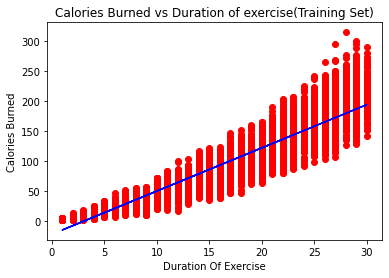

In [55]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Calories Burned vs Duration of exercise(Training Set)')
plt.xlabel('Duration Of Exercise')
plt.ylabel('Calories Burned')
plt.show()

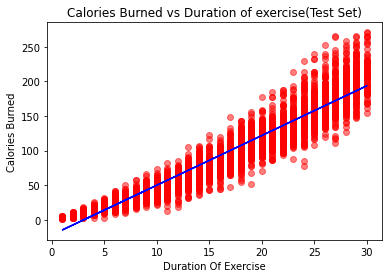

In [58]:
plt.scatter(x_test,y_test,color='red',alpha=0.5)
plt.plot(x_test,regressor.predict(x_test),color='blue')
plt.title('Calories Burned vs Duration of exercise(Test Set)')
plt.xlabel('Duration Of Exercise')
plt.ylabel('Calories Burned')
plt.show()


In [57]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9092356040296028